# 1. Import CSV file 

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('spam.csv')

In [12]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 2. Countplot for Category

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

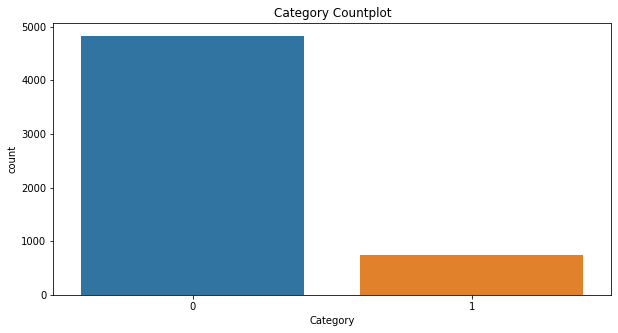

In [17]:
plt.figure(figsize = (10,5))
plt.title('Category Countplot')
sns.countplot(x = 'Category', data = df)
plt.show()

# 3. Mark spam with 1 and ham 0

In [13]:
df.Category = df.Category.apply(lambda x: 1 if x == 'spam' else 0)

In [14]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 4. Train - Test Split

In [27]:
inputs = df.Message

In [20]:
target = df.Category

In [18]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, train_size = 0.8)

In [25]:
len(X_train)

4457

In [26]:
len(X_test)

1115

# 6. Count Vectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
v = CountVectorizer()

In [30]:
X_train_count = v.fit_transform(X_train.values)

# 7. Multinomial Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train_count, y_train)

MultinomialNB()

# 8. Predictions

In [37]:
emails = ['Hello Josh! We are well.',
          'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!']

emails_count = v.transform(emails)
MNB.predict(emails_count)

array([0, 0, 0, 0, 1])

In [38]:
X_test_count = v.transform(X_test)

In [42]:
y_pred = MNB.predict(X_test_count)

In [40]:
MNB.score(X_test_count, y_test)

0.9901345291479821

# 9. Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix

In [44]:
CM = confusion_matrix(y_test, y_pred)

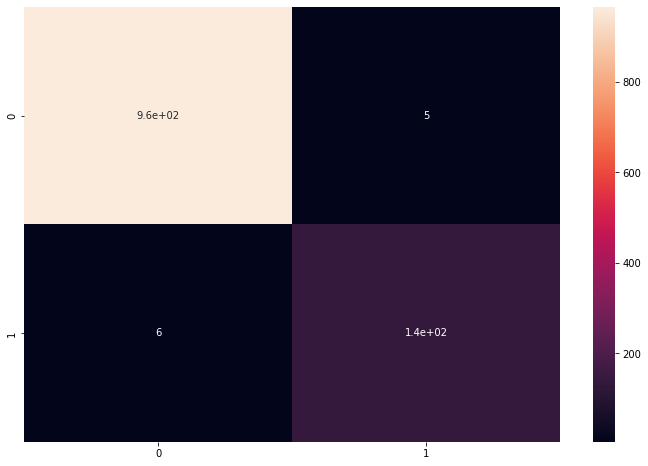

In [51]:
plt.figure(figsize = (12,8))
sns.heatmap(data = CM, annot = True)
plt.show()